In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans

In [3]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

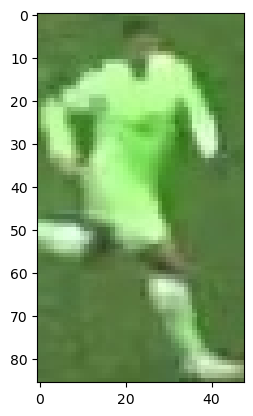

In [4]:
plt.imshow(image)

# To take the op half of the image because the thsirt is always in the top half

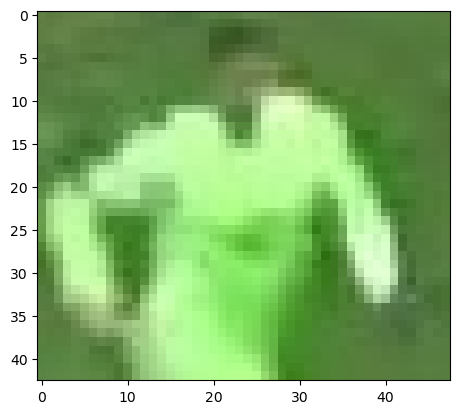

In [ ]:
top_half_image = image[0: int(image.shape[0]/2),:] #image.shape[0] gives the height
plt.imshow(top_half_image)
plt.show()

# To cluster the image into two different clusters 

In [ ]:
#Reshape the image into 2D array 
image_2d = top_half_image.reshape(-1,3) #Since the image is 3D (height, width, 3) , 3 is the number of color channels ,RGB . -1 tells the numpy to take appropriate number of rows automatically and and each row will have 3 columns 

# Apply Clustering 

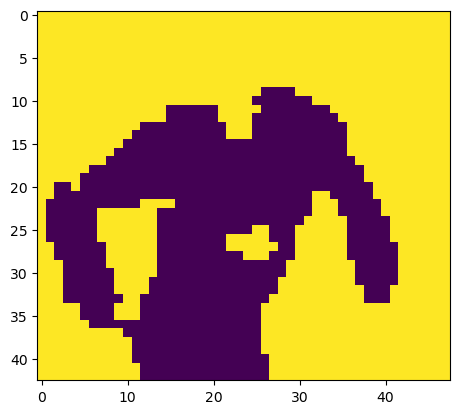

In [14]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

#cluster labels
labels = kmeans.labels_ 

#reshape the labels in the size of the original image
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])
#labels is a 1D array labels = [1,2,1,1,1,1,1,1,2,2,2] for each pixel hame iss 1D array ko waise hi arrange krna hai jaise original image thi taki pixel ki jagah unka label dikhe type shiii

plt.imshow(clustered_image)
plt.show()

In [24]:
print(labels)

[1 1 1 ... 1 1 1]


In [ ]:
# ab labels array me 2 labels honge , one for the grass and one for the tshirt , hame pta lgana hai kaunsa label represents what. Uske liye we'll check the corner wale pixels and unme jo label zyada baar aya hoga matlab that is for the grass and the other one is for the player

corner_clustes  = [clustered_image[0,0], clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster_label = max(set(corner_clustes),key=corner_clustes.count)
print(non_player_cluster_label)

1


In [34]:
#agr no player ka 0 hua to player ka 1 hoga and inverse. bernouli type shi

player_cluster_label = 1- non_player_cluster_label
print(player_cluster_label)

0


In [ ]:
#player ki jersey ka color extract kra this will return the RGB value of the cluster center
kmeans.cluster_centers_[player_cluster_label]

array([171.11330698, 235.40316206, 142.52700922])